In [3]:
import pandas as pd

df=pd.read_csv('./Data/heart.csv', index_col=0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [5]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.target.unique()

array([1, 0])

In [8]:
df.target.value_counts()
# 0 No heart Disease;   1- Heart Disease

1    165
0    138
Name: target, dtype: int64

In [9]:
df.shape[0]

303

In [10]:
# by gender

df.groupby("sex").target.agg(["count"]) /df.shape[0]

,count
sex,
0,0.316832
1,0.683168


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [11]:
X = df.drop('target', axis=1)
y = df.target

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<img src="https://i.ibb.co/16B5Nq1/grid-Search-CV.png" width=500></img>

In [13]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [14]:
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import  

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
    MinMaxScaler( )    # تغيير سلم البيانات الرقمية 
)

cat_pipeline= make_pipeline(
    OneHotEncoder(drop="if_binary",sparse=False )  #   بما ان جميع القيم الناقصة قد تم تعويضا فلا فائدة من معالجتها لذا نقوم هنا باسقاط احد العمودين في حالة المتغير الثنائي
)

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية  
     (cat_pipeline, selector(dtype_include="object")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف  
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية 
)

In [15]:
# التحقق من تحويل  البيانات 
preprocess.fit_transform(X_train).shape

(227, 13)

In [16]:
# حجم البيانات الجديد
preprocess.fit_transform(X_train)[10]

array([0.79166667, 1.        , 0.        , 0.06122449, 0.38799076,
       0.        , 0.        , 0.41221374, 1.        , 0.14516129,
       0.5       , 0.5       , 0.66666667])

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [17]:
from sklearn.svm import SVC
pipe_KNN= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    SVC( probability=True)  #    يعوض لاحقا ضمن المعايير أدناه 
)

In [18]:
from sklearn import set_config
set_config(display='diagram')

In [19]:
# تدريب البيانات
pipe_KNN.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f973e398fd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f973e398ef0>)])),
                ('svc', SVC(probability=True))])

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [20]:
# قياس درجة  دقة  التنبؤ
f" Accurcary {pipe_KNN.score(X_test, y_test):.3}"
#  الاصلي  alpha   باعتمدنا  هنا على   معيار   

' Accurcary 0.842'

In [21]:
#pipeline  معايير  
list(pipe_KNN.get_params().keys())

['memory',
 'steps',
 'verbose',
 'columntransformer',
 'svc',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__minmaxscaler',
 'columntransformer__pipeline-1__minmaxscaler__copy',
 'columntransformer__pipeline-1__minmaxscaler__feature_range',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__steps',
 'columntransformer__pipeline-2__verbose',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__drop',
 'columntransformer__pipeline-2__onehotencoder__dtype',
 'columntransforme

<img src="https://i.ibb.co/2vW8dtL/hyper-Parameters.png" width=300></img>

In [22]:
import numpy as np
param_grid = {
    'svc__gamma': np.geomspace(0.01, 1, 10),
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__C' : np.geomspace(1, 20, 10)
}

In [23]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [24]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score ),
    'roc_auc': make_scorer(roc_auc_score)
}

In [25]:
# %%timeit
from sklearn.model_selection import RandomizedSearchCV
RdSearch = RandomizedSearchCV(pipe_KNN, param_distributions=param_grid, cv=kf, verbose=3, 
                                n_jobs=-1 ,scoring= scorers   , n_iter=1000 , refit="accuracy_score")

In [26]:
# التدريب
RdSearch.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 400 is smaller than n_iter=1000. Running 400 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   35.8s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f973e398fd0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('...
                                        'svc__gamma': array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ]),
                                        'svc__kernel': ['linear', 'poly', 'rbf',
                                                        'sigmoid']},
                   refit='accuracy_score',
                   scoring={'accuracy_score': make_scorer(accuracy_score),
                            'precision_score': make_scorer(precision_score),
                            'recall_score': make_scorer(recall_score),
                            'roc_auc': make_scorer(roc_auc_score)},
                   verbose=3)

In [27]:
# افضل المعايير التي تم الاحتفاظ بها
RdSearch.best_params_ 

{'svc__C': 7.368062997280774,
 'svc__gamma': 0.3593813663804626,
 'svc__kernel': 'rbf'}

In [28]:
#  قائمة أفضل المعاييير
RdSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f973a3d2438>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f973a3d24e0>)])),
                ('svc',
                 SVC(C=7.368062997280774, gamma=0.3593813663804626,
                     probability=True))])

In [31]:
# قياس الدقة في ضوء أفضل المعايير
f" Score {RdSearch.best_estimator_.score(X_test, y_test):.3}"

' Score 0.868'

In [32]:
y_pred=RdSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}' 

'Accuracy: 0.868'

In [33]:
# نسبة التنبؤ  بالمقارنة مع القيم الأصلية 
f'Accuracy: {recall_score(y_test, y_pred):.3}' 

'Accuracy: 0.93'

In [34]:
#  Precision / recall  بين    F1  يوازن معيار القيس  
from sklearn import metrics
f'Accuracy: {metrics.f1_score(y_test, y_pred):.3}' 

'Accuracy: 0.889'

In [35]:
f"Performance sur le train : {roc_auc_score(y_train, RdSearch.predict(X_train))} "

'Performance sur le train : 0.914832162373146 '

In [36]:
# overfitting problem
f"Performance sur le train : {roc_auc_score(y_test, RdSearch.predict(X_test)):0.3} "

'Performance sur le train : 0.859 '

In [37]:
f"Performance sur le Test : {recall_score(y_test, RdSearch.predict(X_test)):0.3} "

'Performance sur le Test : 0.93 '

In [38]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.85      0.93      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76



In [39]:
! pip install  scikit-plot

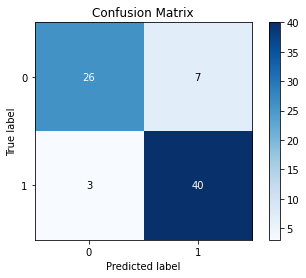

In [40]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred ) #, normalize=True)

- Roc Curve is a useful tool when predicting the probability of a binary outcome. It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0.

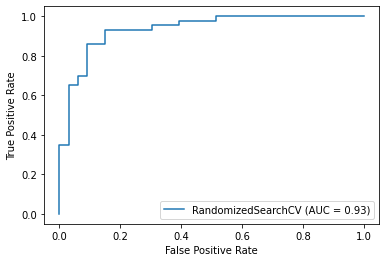

In [41]:
metrics.plot_roc_curve(RdSearch, X_test, y_test)

In [42]:
# جدول الأحتمالات
y_probas = RdSearch.predict_proba(X_test)

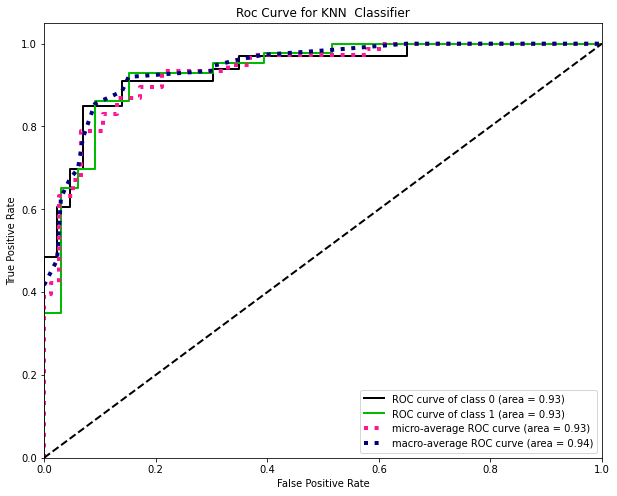

In [43]:
skplt.metrics.plot_roc(y_test, y_probas, title="Roc Curve for KNN  Classifier",
 figsize=(10, 8))

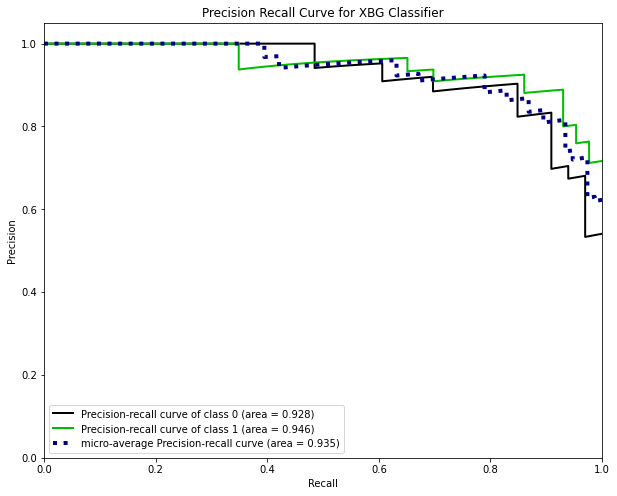

In [46]:
skplt.metrics.plot_precision_recall(y_test, y_probas, title="Precision Recall Curve for XBG Classifier", figsize=(10, 8)
)

- The precision-recall curve shows the tradeoff between precision and recall for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false-positive rate, and high recall relates to a low false-negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

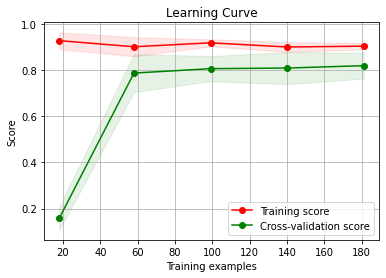

In [44]:
skplt.estimators.plot_learning_curve(pipe_KNN, X_train, y_train, scoring="f1")

https://scipy-lectures.org/packages/scikit-learn/index.html